In [103]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
np.random.seed(2)

# 1.

The rolling of 2 dice that sum to 7 is more likely, as there are 6 combinations of dice that would sum to 7, as opposed to the single combination that results in snake eyes. The ratio of the probabilities is (1/36)/(6/36) = 1/6.

# 2.

In [104]:
sums = [2,3,4,5,6,7,8,9,10,11,12]
weights = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]
# weights calculated through counting

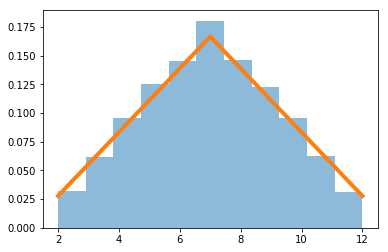

In [106]:
fig, ax = plt.subplots(1,1)
rolls = np.array([1,2,3,4,5,6])
w_rolls = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
res = np.zeros([10000,1])
for i in range(0,10000):
    v = np.random.randint(1,7,2)
    res[i] = sum(v)
ax.hist(res,bins=len(sums),density=True,alpha=.5);
w_con = np.convolve(w_rolls,w_rolls)
ax.plot(sums,w_con,linewidth=4);

# 3.

In [107]:
# Using the expectation value formula to derive the mean
mean = sum(sums*w_con)
print(mean)

7.0


In [108]:
# Using the mean to determine the variance
xi = (sums-mean)**2
xs = sum(xi*w_con)
print(xs)

5.833333333333334


These values make sense since 7 is the most probable value, and the distribution is even on either side of 7. The variance makes sense since the standard deviation is the square root of the variance and thus approximately 2.415. 2 standard deviations away from the mean of 7 is 11.83, and any value higher than that should account for approximately 2.2% of the total probability, which it does since the probability for rolling a 12 as a sum is very close to that value.

# 4.

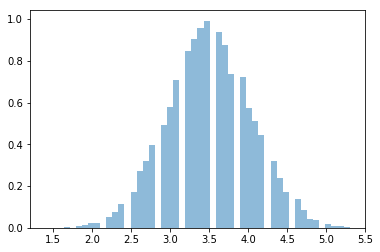

In [162]:
# Histogram of averages
fig, ax = plt.subplots(1,1)
rolls = np.array([1,2,3,4,5,6])
w_rolls = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
res10 = np.zeros([10000,1])
avg10 = np.zeros([10000,1])
for i in range(0,10000):
    v10 = np.random.randint(1,7,10)
    res10[i] = sum(v10)
    avg10[i] = res10[i]/(10)
mu, std = stats.norm.fit(avg10)
ax.hist(avg10,bins=50,density=True,alpha=.5);

The average does follow a gaussian distribution. Since the average is proportional to the sum distribution, it follows a gaussian distribution as well. The clear peak and wing pattern of the histogram points directly to a gaussian.

# 5.

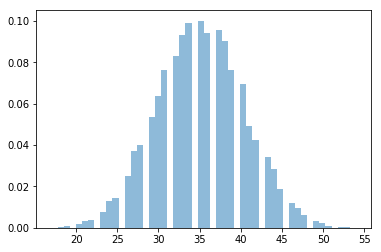

In [163]:
# Histogram of possible sums and associated probabilities
fig, ax = plt.subplots(1,1)
rolls = np.array([1,2,3,4,5,6])
w_rolls = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
res10 = np.zeros([10000,1])
for i in range(0,10000):
    v10 = np.random.randint(1,7,10)
    res10[i] = sum(v10)
mu, std = stats.norm.fit(avg10)
ax.hist(res10,bins=50,density=True,alpha=.5);

The average of the histogram above was graphed in problem 4, and clearly follows the gaussian distribution that the overall sums and probabilities follow. The sum of an initially gaussian distribution will also be a gaussian because the characteristic functions of two random variables can be derived to get the summed characteristic function, which is just the same as the initial function except adding the second variable into where the first variable was. Thus the distribution does not undergo any changes to the shape of it. The resulting standard deviation is the square root of the two variances added together, which is smaller than if the two standard deviations were just added together. For example, the variance of A and B is 25, and their standard deviations are both 5. The standard deviation of the sum of these two variables is the square root of 50, which is greater than a single standard deviation and less than if they were both added together. What this means for integrating a signal over time is that the standard deviation changes for increases or decreases in the signals shape. We must re-evaluate the distribution for separate times if we are to get an accurate standard deviation.